<a href="https://colab.research.google.com/github/Yurovskyy/TPF/blob/main/trabalhofinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Participantes
Yuri Fonseca Lopes - 214450006

# 1. Formalização do problema

## 1.1 Contextualização

Existem várias maneiras de avaliar o desempenho de uma empresa. Essa avaliação nos ajuda decidir se é válido comprar ações da mesma. Alguns métodos existentes são:

CAPM (Modelo de precificação de ativos de capital). É um método que analise a relação entre o risco e o retorno que é esperado de um investimento, obtido a partir de princípios de diversificação com pressupostos simplificados.

HME (Hipótese do mercado eficiente). Essa hipótese afirma que os mercados são eficientes, ou seja, um agente não consegue alcançar consistentemente retornos superioers à média do mercado, pois os preços dos ativos refletem toda a informação disponível em um dado momento de tempo.

Análise técnica. É uma busca por padrões recorrentes e previsíveis nos preços do ativo.

Análise Fundamentalista. Utiliza indicadores financeiros, de gestão, do negócio e do risco da empresa, além de índices macroeconômicos na busca de determinar o valor presente descontado dos fluxos de caixa da empresa para chegar ao valor justo de cada ação.

# 2. Mudanças em relação ao TP1

## 2.1 Motivações

No TP1, eu mapeei os Índices de Governança para valores numéricos e apliquei o K-means nesses novos valores somados. ~~Nesse trabalho não irei realizar essa soma, irei inserir todos os 54 Índices de Governça. Por conta disso, urei usar redução de dimensionalidade para visualização dos clusters.~~
Foi disponibilizado uma nova database que já realiza essa soma. Essa nova soma ponderada contém um mapeamento das respostas das empresas, seguindo:

- 0 -> não se aplica
- 1 -> não
- 2 -> parcialmente
- 3 -> sim

e a ponderação dada por:

$$GC_i=(\frac{1}{N_i.W_{max}}).\sum_{j=1}^{N_i}w_{ij}$$

"Em que GC i é indicador de governança corporativa padronizado, correspondente ao capítulo i; Ni representa o número total de perguntas no questionário do capítulo i; wij refere-se ao peso atribuído à resposta j no capítulo i, de acordo com a escala escolhida; Wmax representa o peso máximo atribuído a uma resposta, conforme definido pela escala escolhida, ou seja, o valor é igual a 3 para este estudo".

Fiz uma revisão na literatura que acabou comprovando uma ideia que eu tive no TP1. Empresas que não pontuam bem no Social e Ambiental (Social and Enviromental) e pontuaram bem em Governança acabam tendo rendimentos maiores que as demais.

ALAEI, M. M.; OTHMAN, M. F.; YUSOF, R.; BUKHARI, N. S.; ALIPANAH, M.; AHMAD, A. A new approach for sensor fault detection using deep learning algorithms in industrial processes. Energy Reports, v. 8, p. 684-693, 2022. DOI: 10.1016/j.egyr.2022.03.089.

Que se encontra em: https://www.sciencedirect.com/science/article/pii/S221484502200093X

O Professor Marcos também me mandou um artigo que encontra uma relação equivalente para o cenário Brasileiro, onde empresas com alto DR tendem a ter retorno menor. Esse artigo ainda não foi publicado, por isso não existe citação nem fonte do mesmo.

~~Esse trabalho citado usou clusterização com o Kmeans++ na bolsa da Turquia. Vou tentar preparar o ambiente para fazer o mesmo aqui com a Bolsa Brasileira. Contudo, terei que adquirir novos dados, pois a base de dados ainda não conta com o rendimento (e outros indicadores de empresas). O trabalho citado usou uma base de dados paga 😒~~

Como dito, usarei a nova base de dados, que atualmente se encontra em: https://github.com/Yurovskyy/TP3/blob/main/output.csv

Essa nova abordagem continua sendo relevante, pois possibilita a identificação de intervalos de Indices de Governança (soma ponderada) específicos que indicam bons rendimentos. Com esse novo conhecimento, podemos por exemplo identificar uma empresa que irá realizar um IPO e prever o rendimento dela com base nos possíveis índices que a mesma irá cumprir durante o tempo.

## 2.1 Hipóteses a serem investigadas e possíveis análises

1. Testar via clusterização o que foi mostrado no artigo, ou seja, empresas com alto DR tem retornos baixos.

2. Achar um cluster de empresas com alto retorno e analisar a soma ponderada dos índices das mesmas.

~~3. Visualizar o cluster de empresas com alto retorno, ver o tipo de empresa, tamanho, valor de mercado.~~

~~4. Aplicar uma regressão para tentar estimar o retorno das empresas com base na soma pondera dos índices.~~

# 3. Mudanças em relação ao TP3

Foi pedido que o trabalho seja escrito e desenvolvido de uma maneira mais formal.

Foi sugerido separar a base de dados por ano e clusterizar. Isso facilitará a compreensão dos dados e nos dará a possíbilidade de ver os efeitos da pandemia nos retornos e nas somas ponderadas.

Foi sugerido a criação de gráficos expondo o resultados da clusterização.

Foi sugerido a análise do DR para uma mesma empresa em anos diferentes.

Foi sugerido que o foco do trabalho seja apenas 2 hipóteses. Eu escolhi as 2 primeiras do TP3.

Além desses principais, temos outros menores, como:
- Não expor dados desnecessários
- Fazer uma tabela explicativa das siglas do dataset



# 4. Análise exploratória de dados (EDA)

In [1]:
# @title Realizando os imports necessários

import pandas as pd
import requests
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
import plotly.express as px

In [33]:
# @title Carregando o dataset

# URL do arquivo CSV
url = 'https://github.com/Yurovskyy/TP3/raw/main/output.csv'

# Baixar o arquivo CSV da web
response = requests.get(url)

# Verificar se a solicitação foi bem-sucedida
if response.status_code == 200:
    # Ler o conteúdo do arquivo CSV usando o Pandas
    df = pd.read_csv(url)

# Se a solicitação não for bem-sucedida
else:
    print('Falha ao baixar o arquivo CSV.')


In [3]:
# @title Exploração inicial do dataset

dimensoes = df.shape
print("Número de entradas(linhas):", dimensoes[0])
print("Número de colunas(variáveis):", dimensoes[1])

# identificar o tipo de cada variável
display(df.dtypes)

# ver as 5 primeiras entradas do conjunto de treino
display(df.head())

Número de entradas(linhas): 4944
Número de colunas(variáveis): 14


,0
Index,float64
firm,int64
BE,float64
ME,float64
ME.lag1,float64
r_i,float64
r.3.0,float64
r.12.4,float64
AC,float64
CA,float64


,Index,firm,BE,ME,ME.lag1,r_i,r.3.0,r.12.4,AC,CA,DR,OFC,ECI,industry
0,2020.75,1,1.179763e+09,1.217182e+09,1.200622e+09,0.089471,-0.013699,-0.618101,0.500000,0.694444,0.750000,0.433333,0.805556,Outros
1,2020.50,1,1.262906e+09,1.064582e+09,1.217182e+09,-0.013699,0.142185,-0.471392,0.500000,0.611111,0.750000,0.400000,0.833333,Outros
2,2022.00,1,1.205650e+09,1.354615e+09,1.761918e+09,0.181542,0.259363,0.039740,0.527778,0.722222,0.750000,0.666667,0.833333,Outros
3,2021.25,1,1.190537e+09,1.312840e+09,1.064523e+09,0.267479,-0.209721,0.217958,0.500000,0.694444,0.750000,0.433333,0.805556,Outros
4,2023.00,1,1.072554e+09,2.471660e+09,2.544702e+09,0.042154,0.029124,0.337521,0.527778,0.888889,0.958333,0.766667,0.722222,Outros


## Expicação do dataset

Index = Data

Firm = Número da firma (cada firma recebeu um número, temos diferentes amostas para a mesma firma)

BE = Patrimônio líquido das empresas

ME = Valor de mercado

r.12.4 = Retorno acumulado nos últimos 12 meses

AC = Acionistas

CA = Conselho e Administração

DR = Diretoria

OFC = Órgãos de Fiscalização e Controle

ECI = Ética e conflitos de Interesses

Industry = Tipo de industria, podendo conter:

Agro e Pesca, Alimentos e Bebidas, Comércio, Construção, Eletro-eletrônicos, Energia Elétrica, Máquinas Industriais, Mineração, Minerais não Metálicos, Outros, Papel e Celulose, Petróleo e Gás, Química, Siderurgia e Metalurgia, Software e Dados, Telecomunicações, Têxtil, Transporte Serviços, Veículos e peças, “Finanças e Seguros” (financeiras)


In [34]:
df = df.drop(columns=["ME.lag1","r_i","r.3.0"])

In [5]:
# @title Valores faltantes
# @markdown Como eu disse, não temos valores faltantes!

# ver a porcentagem valores faltantes
display((df.isnull().sum() / df.shape[0]).sort_values(ascending=False))

,0
Index,0.0
firm,0.0
BE,0.0
ME,0.0
r.3.0,0.0
r.12.4,0.0
AC,0.0
CA,0.0
DR,0.0
OFC,0.0


In [6]:
# @title Descrição dos valores categóricos

display(df.describe(include=['O']))

,industry
count,4944
unique,20
top,Outros
freq,1145


In [7]:
# @title Visualização do Market Value por Retorno Anual

fig = px.scatter(df,
                 x='ME',
                 y='r.12.4',
                 hover_data=["industry","firm"],
                 title="Market Value por Retorno Anual")

fig.show()

In [8]:
# @title Visualização do Tipo de Industria por Retorno Anual

fig = px.scatter(df,
                 x='industry',
                 y='r.12.4',
                 hover_data=["ME","firm"],
                 title="Tipo de industria por Retorno Anual")

fig.show()

In [9]:
# @title Visualização do histograma dos retornos anuais
# @markdown Percebe-se que as empresas desse dataset são lucrativas, mas por muito pouco

fig = px.histogram(df, x='r.12.4', title='Histograma dos valores')
fig.show()

In [13]:
# @title Estatistica descritiva

display(df[["BE","ME","r.12.4","AC","CA","DR","OFC","ECI"]].describe())

,BE,ME,r.12.4,AC,CA,DR,OFC,ECI
count,4.944000e+03,4.944000e+03,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000
mean,9.244580e+09,1.647379e+10,0.017635,0.528727,0.781031,0.845292,0.710720,0.764979
std,2.990092e+10,4.501468e+10,0.441591,0.148566,0.130017,0.135652,0.165161,0.139815
min,5.600000e+04,1.597143e+06,-1.960695,0.194444,0.361111,0.333333,0.233333,0.305556
25%,7.253755e+08,8.281819e+08,-0.211830,0.416667,0.694444,0.791667,0.600000,0.694444
50%,1.794868e+09,3.431592e+09,0.021291,0.527778,0.805556,0.875000,0.733333,0.777778
75%,6.121884e+09,1.161053e+10,0.254705,0.638889,0.888889,0.958333,0.833333,0.861111
max,4.341940e+11,5.705210e+11,5.134580,0.833333,1.000000,1.000000,1.000000,1.000000


# 4. Primeira clusterização

O kmeans é um algoritmo de ML que separa os dados em clusters. Esses clusters -para ser uma boa clusterizaçaõ- , devem ter os dados intra clusters bem próximos (distância reduzida) e os clusters devem estar bem longe deles mesmos (distância alta entre os centróides).

In [35]:
# @title Dropando a culuna do tipo objeto para clusterizar

df = df.drop(columns=["industry"])

In [36]:
# @title Separando por ano

df['Year'] = pd.to_datetime(df['Index'], format='%Y').dt.year

In [39]:
# @title Filtrando para o ano de 2022
df_2022 = df[df['Year'] == 2022]

display(df_2022.head())

,Index,firm,BE,ME,r.12.4,AC,CA,DR,OFC,ECI,Year
2,2022.00,1,1.205650e+09,1.354615e+09,0.039740,0.527778,0.722222,0.750000,0.666667,0.833333,2022
5,2022.25,1,1.175292e+09,1.761918e+09,0.508824,0.527778,0.722222,0.750000,0.666667,0.833333,2022
7,2022.75,1,1.145368e+09,2.298233e+09,0.524242,0.527778,0.888889,0.958333,0.766667,0.722222,2022
9,2022.50,1,1.159398e+09,2.112654e+09,0.422886,0.527778,0.722222,0.750000,0.666667,0.833333,2022
19,2022.50,2,4.774273e+09,3.798258e+09,0.126815,0.527778,0.861111,0.958333,0.866667,0.833333,2022


In [52]:
# @title Filtrando pelos anos restantes

df_2019 = df[df['Year'] == 2019]
df_2020 = df[df['Year'] == 2020]
df_2021 = df[df['Year'] == 2021]
df_2023 = df[df['Year'] == 2023]

dfs_por_ano = [df_2019, df_2020, df_2021, df_2022, df_2023]


# Por conta de que clusterizamos com mais de 2 dimensões, o resultado não se torna inicialmente compreensível, sendo necessário realizar uma redução de dimensionalidade

In [60]:
# @title Normalizando os dados e clusterizando

def processar_dados(df_ano, n_clusters=3):
    # Normalizando os dados
    scaler = StandardScaler()
    values = scaler.fit_transform(df_ano[["AC", "CA", "DR", "OFC", "ECI"]])

    # Clusterizando com KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    df_ano['Cluster'] = kmeans.fit_predict(values)

    # Reduzindo dimensionalidade com PCA
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(values)

    # Convertendo X_reduced para DataFrame e adicionando as colunas originais
    df_reduced = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
    df_reduced['Cluster'] = df_ano['Cluster'].astype(str)
    df_reduced['Index'] = df_ano['Index']
    df_reduced['firm'] = df_ano['firm']
    df_reduced['BE'] = df_ano['BE']
    df_reduced['ME'] = df_ano['ME']
    df_reduced['r.12.4'] = df_ano['r.12.4']
    df_reduced['AC'] = df_ano['AC']
    df_reduced['CA'] = df_ano['CA']
    df_reduced['DR'] = df_ano['DR']
    df_reduced['OFC'] = df_ano['OFC']
    df_reduced['ECI'] = df_ano['ECI']

    # Retorna o DataFrame reduzido com informações completas
    return df_reduced

df_2019_reduced = processar_dados(df_2019)
df_2020_reduced = processar_dados(df_2020)
df_2021_reduced = processar_dados(df_2021)
df_2022_reduced = processar_dados(df_2022)
df_2023_reduced = processar_dados(df_2023)

fig = px.scatter(df_2022_reduced, x='Index', y='r.12.4', color='Cluster', hover_data=["PC1","PC2","Index","firm","BE","ME","r.12.4","AC","CA","DR","OFC","ECI"], title='Primeira visualização')
fig.show()

<ipython-input-60-c64fc682304d>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-60-c64fc682304d>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-60-c64fc682304d>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-60-c64f

# 5. Hiperparâmetros

Vamos realizar alguns testes para definir o hiperparâmetro k corretamente. K é o número de clusters (também chamado de n_clusters).

É importante citar que fixamos o random_state para garantir estabilidade nas diversas clusterizações. Randon_state=42.

n_init=10 se fez necessário para evitar os avisos de atualização do scikitlearn, mas o padrão já é 10.

O método de inicialização dos centróides é o padrão, ou seja, kmeans++.

A clusterização desse dataset não é muito custosa computacionalmente falando, logo não vamos precisar usar n_jobs para paralelismo.

Os demais hiperparâmetros foram definidos como default.

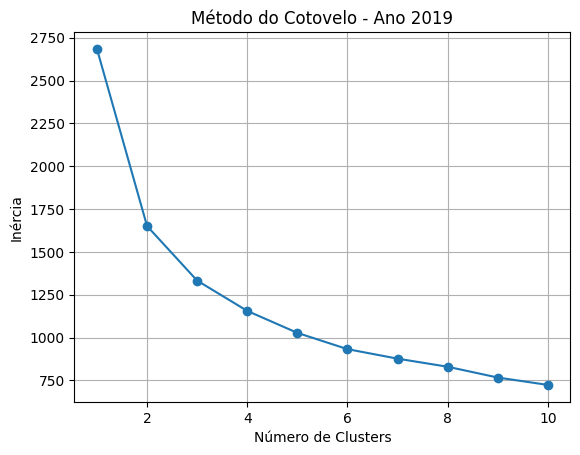

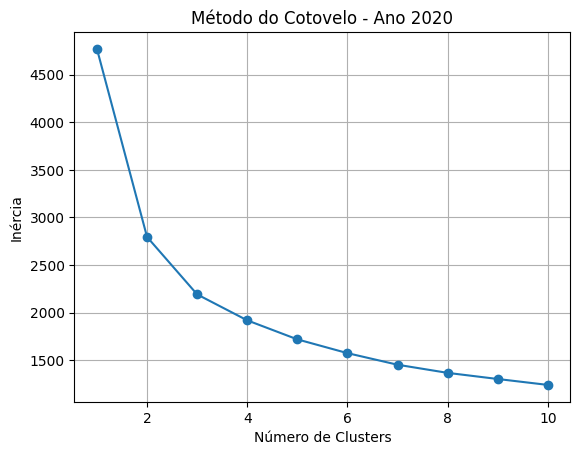

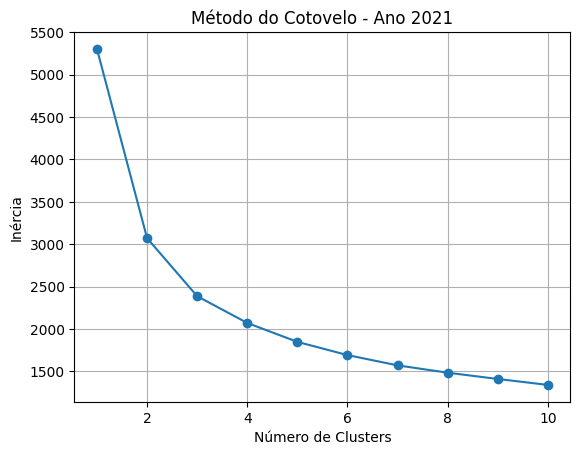

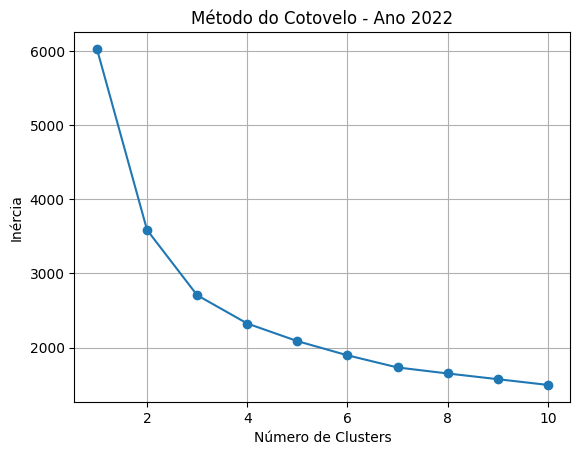

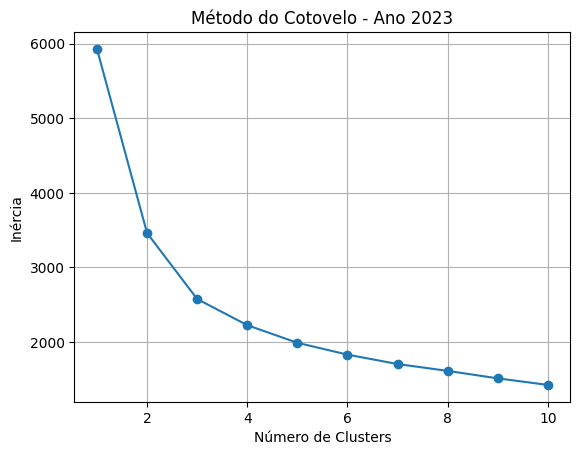

In [62]:
# @title Realizando o teste do cotovelo

def teste_cotovelo(df_ano):
    # Normalizando os dados
    scaler = StandardScaler()
    values = scaler.fit_transform(df_ano[["AC", "CA", "DR", "OFC", "ECI"]])

    # Lista para armazenar as inertias
    inertias = []

    # Testar diferentes números de clusters
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
        kmeans.fit(values)
        inertias.append(kmeans.inertia_)

    # Plotar o gráfico do cotovelo
    plt.plot(range(1, 11), inertias, marker='o')
    plt.title(f'Método do Cotovelo - Ano {df_ano["Year"].iloc[0]}')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inércia')
    plt.grid(True)
    plt.show()

# Aplicando o teste do cotovelo para cada DataFrame anual
teste_cotovelo(df_2019)
teste_cotovelo(df_2020)
teste_cotovelo(df_2021)
teste_cotovelo(df_2022)
teste_cotovelo(df_2023)

In [66]:
# @title Avaliando a sihoueta
# @markdown Calcula a coesão (media das distancias entre todos os pontos entre o cluster) e tenta minimizar esse valor e calcula a separação (media das distancias entre uma amostra e os outros clusters) e tenta maximizar

def teste_silhueta(df_ano):
    # Normalizando os dados
    scaler = StandardScaler()
    values = scaler.fit_transform(df_ano[["AC", "CA", "DR", "OFC", "ECI"]])

    # Testar diferentes números de clusters
    for n_clusters in range(2, 11):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(values)

        # Calcula a pontuação média da silhueta
        silhouette_avg = silhouette_score(values, cluster_labels)
        print(f"Ano {df_ano['Index'].iloc[0]:.0f}: Para n_clusters = {n_clusters}, a pontuação média da silhueta é: {silhouette_avg:.4f}")

    print("--------------------------------------------------------------------")
# Aplicando o teste da silhueta para cada DataFrame anual
teste_silhueta(df_2019)
teste_silhueta(df_2020)
teste_silhueta(df_2021)
teste_silhueta(df_2022)
teste_silhueta(df_2023)

Ano 2020: Para n_clusters = 2, a pontuação média da silhueta é: 0.3449
Ano 2020: Para n_clusters = 3, a pontuação média da silhueta é: 0.2419
Ano 2020: Para n_clusters = 4, a pontuação média da silhueta é: 0.2468
Ano 2020: Para n_clusters = 5, a pontuação média da silhueta é: 0.2294
Ano 2020: Para n_clusters = 6, a pontuação média da silhueta é: 0.2327
Ano 2020: Para n_clusters = 7, a pontuação média da silhueta é: 0.2304
Ano 2020: Para n_clusters = 8, a pontuação média da silhueta é: 0.2298
Ano 2020: Para n_clusters = 9, a pontuação média da silhueta é: 0.2351
Ano 2020: Para n_clusters = 10, a pontuação média da silhueta é: 0.2424
--------------------------------------------------------------------
Ano 2021: Para n_clusters = 2, a pontuação média da silhueta é: 0.3422
Ano 2021: Para n_clusters = 3, a pontuação média da silhueta é: 0.2651
Ano 2021: Para n_clusters = 4, a pontuação média da silhueta é: 0.2569
Ano 2021: Para n_clusters = 5, a pontuação média da silhueta é: 0.2315
Ano 202

In [68]:
# @title Avaliando o Indice Calinski-Hazabasz
# @markdown Índice de Calinski-Harabasz: Mede a razão entre a dispersão entre clusters e a dispersão dentro dos clusters. Valores mais altos indicam melhor clusterização.

def teste_calinski_harabasz(df_ano):
    # Normalizando os dados
    scaler = StandardScaler()
    values = scaler.fit_transform(df_ano[["AC", "CA", "DR", "OFC", "ECI"]])

    # Testar diferentes números de clusters
    for n_clusters in range(2, 11):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(values)

        # Calcula o índice Calinski-Harabasz
        ch_index = calinski_harabasz_score(values, cluster_labels)
        print(f"Ano {df_ano['Index'].iloc[0]:.0f}: Para n_clusters = {n_clusters}, o índice Calinski-Harabasz é: {ch_index:.4f}")

    print("--------------------------------------------------------------------")
# Aplicando o teste do índice Calinski-Harabasz para cada DataFrame anual
teste_calinski_harabasz(df_2019)
teste_calinski_harabasz(df_2020)
teste_calinski_harabasz(df_2021)
teste_calinski_harabasz(df_2022)
teste_calinski_harabasz(df_2023)

Ano 2020: Para n_clusters = 2, o índice Calinski-Harabasz é: 334.9935
Ano 2020: Para n_clusters = 3, o índice Calinski-Harabasz é: 270.9471
Ano 2020: Para n_clusters = 4, o índice Calinski-Harabasz é: 235.0455
Ano 2020: Para n_clusters = 5, o índice Calinski-Harabasz é: 214.5065
Ano 2020: Para n_clusters = 6, o índice Calinski-Harabasz é: 199.5362
Ano 2020: Para n_clusters = 7, o índice Calinski-Harabasz é: 182.0813
Ano 2020: Para n_clusters = 8, o índice Calinski-Harabasz é: 168.9293
Ano 2020: Para n_clusters = 9, o índice Calinski-Harabasz é: 165.0652
Ano 2020: Para n_clusters = 10, o índice Calinski-Harabasz é: 158.6647
--------------------------------------------------------------------
Ano 2021: Para n_clusters = 2, o índice Calinski-Harabasz é: 672.6976
Ano 2021: Para n_clusters = 3, o índice Calinski-Harabasz é: 559.3189
Ano 2021: Para n_clusters = 4, o índice Calinski-Harabasz é: 470.3698
Ano 2021: Para n_clusters = 5, o índice Calinski-Harabasz é: 420.9120
Ano 2021: Para n_clu

In [72]:
# @title Descrevendo estatisticamente os clusters para testar hipótese

df_reduced = df_2021_reduced.drop(columns=["PC1","PC2","Index","firm"])
for cluster in df_reduced["Cluster"].unique():

    print(f"Resumo estatístico do Cluster {cluster}:")
    display(df_reduced[df_reduced["Cluster"] == cluster].describe().drop(['min', '25%', '50%', '75%', 'max']))
    print("\n" + "="*50 + "\n")

Resumo estatístico do Cluster nan:


,BE,ME,r.12.4,AC,CA,DR,OFC,ECI
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




Resumo estatístico do Cluster 2:


,BE,ME,r.12.4,AC,CA,DR,OFC,ECI
count,1.040000e+02,1.040000e+02,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,3.561241e+09,9.473394e+09,0.134556,0.452724,0.740385,0.844551,0.676282,0.747062
std,5.996120e+09,2.297520e+10,0.404396,0.104430,0.071767,0.087330,0.124520,0.095515




Resumo estatístico do Cluster 0:


,BE,ME,r.12.4,AC,CA,DR,OFC,ECI
count,8.900000e+01,8.900000e+01,89.000000,89.000000,89.000000,89.000000,89.000000,89.00000
mean,2.097055e+10,4.168464e+10,0.196397,0.607366,0.885456,0.937734,0.856180,0.84613
std,4.001483e+10,6.558121e+10,0.505605,0.118385,0.059196,0.073824,0.066968,0.08110




Resumo estatístico do Cluster 1:


,BE,ME,r.12.4,AC,CA,DR,OFC,ECI
count,3.500000e+01,3.500000e+01,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,3.814707e+08,8.375172e+08,0.208782,0.370635,0.559524,0.634524,0.490476,0.542857
std,5.546674e+08,1.363532e+09,0.396023,0.100368,0.071344,0.105548,0.126432,0.075426


# Confirmamos a hipótese 1!
 Testar via clusterização o que foi mostrado no artigo, ou seja, empresas com alto DR tem retornos baixos.

In [ ]:
cluster_2_data = df_reduced[df_reduced["Cluster"] == "2"]

values_cluster_2 = cluster_2_data[["AC","CA","DR","OFC","ECI"]].values

kmeans_cluster_2 = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_2_data['SubCluster'] = kmeans_cluster_2.fit_predict(values_cluster_2)

<ipython-input-23-5eab21e957ce>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.scatter(cluster_2_data, x='PC1', y='PC2', color='SubCluster',
                 hover_data=["Index", "firm", "BE", "ME", "r.12.4", "AC", "CA", "DR", "OFC", "ECI"],
                 title='Sub-Clusterização do Cluster 2')
fig.show()

# 3. A análise 3 foi concluída!
Visualizar o cluster de empresas com alto retorno, ver o tipo de empresa, tamanho, valor de mercado.

In [ ]:
for cluster in cluster_2_data["SubCluster"].unique():
    print(f"Resumo estatístico do Cluster {cluster}:")
    display(cluster_2_data[cluster_2_data["SubCluster"] == cluster].describe())
    print("\n" + "="*50 + "\n")

Resumo estatístico do Cluster 2:


,PC1,PC2,Index,firm,BE,ME,r.12.4,AC,CA,DR,OFC,ECI,SubCluster
count,3.470000e+02,3.470000e+02,347.000000,347.000000,3.470000e+02,3.470000e+02,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.0
mean,-2.169287e+10,8.246874e+08,2571.553314,437.386167,1.339345e+09,2.191558e+09,0.100500,0.501281,0.622398,0.700288,0.458405,0.557477,2.0
std,4.826657e+09,7.322242e+08,1382.208737,239.412638,1.939582e+09,3.179469e+09,0.554357,0.090310,0.073032,0.105067,0.089218,0.091086,0.0
min,-2.508968e+10,-2.306927e+09,181.000000,29.000000,2.320000e+05,4.231305e+06,-1.280934,0.277778,0.472222,0.458333,0.233333,0.333333,2.0
25%,-2.465395e+10,6.244087e+08,1512.500000,261.000000,1.862615e+08,2.539801e+08,-0.199414,0.444444,0.583333,0.625000,0.400000,0.500000,2.0
50%,-2.383103e+10,8.475554e+08,2415.000000,399.000000,5.394570e+08,7.534239e+08,0.071744,0.500000,0.611111,0.708333,0.466667,0.555556,2.0
75%,-2.159116e+10,1.069958e+09,3762.000000,632.000000,1.518928e+09,2.274512e+09,0.307985,0.583333,0.666667,0.750000,0.533333,0.611111,2.0
max,-3.924831e+09,4.234722e+09,4815.000000,845.000000,1.052235e+10,1.472955e+10,5.134580,0.694444,0.777778,1.000000,0.700000,0.750000,2.0




Resumo estatístico do Cluster 1:


,PC1,PC2,Index,firm,BE,ME,r.12.4,AC,CA,DR,OFC,ECI,SubCluster
count,2.190000e+02,2.190000e+02,219.000000,219.000000,2.190000e+02,2.190000e+02,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.0
mean,-2.339254e+10,5.708149e+08,2488.945205,418.036530,4.280267e+08,1.171709e+09,0.179414,0.286149,0.531456,0.577055,0.417199,0.441400,1.0
std,3.393673e+09,9.356146e+08,1336.625515,224.506142,5.689762e+08,2.475810e+09,0.408906,0.051869,0.053912,0.094697,0.100323,0.105278,0.0
min,-2.507679e+10,-3.680616e+09,325.000000,63.000000,4.180000e+05,1.116357e+07,-1.048414,0.222222,0.388889,0.416667,0.266667,0.305556,1.0
25%,-2.487055e+10,7.663060e+08,1369.500000,242.000000,9.657200e+07,1.439934e+08,-0.031036,0.222222,0.500000,0.541667,0.333333,0.361111,1.0
50%,-2.451756e+10,8.365324e+08,2956.000000,485.000000,2.384650e+08,3.690042e+08,0.125915,0.305556,0.527778,0.583333,0.400000,0.416667,1.0
75%,-2.395466e+10,9.154094e+08,3502.500000,583.000000,5.278455e+08,7.014696e+08,0.404454,0.333333,0.555556,0.625000,0.450000,0.472222,1.0
max,-7.409746e+09,1.280370e+09,4869.000000,852.000000,3.282128e+09,1.511550e+10,1.527193,0.416667,0.611111,0.833333,0.666667,0.722222,1.0




Resumo estatístico do Cluster 0:


,PC1,PC2,Index,firm,BE,ME,r.12.4,AC,CA,DR,OFC,ECI,SubCluster
count,2.690000e+02,2.690000e+02,269.000000,269.000000,2.690000e+02,2.690000e+02,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.0
mean,-2.129205e+10,6.180039e+08,2517.576208,430.594796,1.309630e+09,2.476052e+09,0.100008,0.367307,0.583333,0.586431,0.622429,0.636617,0.0
std,6.323814e+09,1.727421e+09,1549.037130,266.844907,1.994403e+09,4.230821e+09,0.379454,0.086063,0.069174,0.078304,0.090768,0.082643,0.0
min,-2.507891e+10,-1.268995e+10,343.000000,64.000000,6.241000e+06,1.233600e+07,-0.935685,0.222222,0.361111,0.333333,0.433333,0.500000,0.0
25%,-2.452029e+10,6.375228e+08,965.000000,165.000000,2.046420e+08,2.920704e+08,-0.105361,0.305556,0.527778,0.541667,0.566667,0.583333,0.0
50%,-2.374811e+10,8.889342e+08,2168.000000,353.000000,9.755940e+08,7.329551e+08,0.071364,0.361111,0.555556,0.583333,0.633333,0.638889,0.0
75%,-2.045150e+10,1.242189e+09,4010.000000,681.000000,1.655660e+09,3.071590e+09,0.337830,0.416667,0.611111,0.666667,0.700000,0.666667,0.0
max,2.323480e+10,6.854908e+09,4906.000000,855.000000,1.548351e+10,3.484827e+10,1.313343,0.666667,0.777778,0.750000,0.866667,0.861111,0.0


# A análise 2 foi concluída!
Achar um cluster de empresas com alto retorno e analisar a soma ponderada dos índices das mesmas.

In [ ]:
# Separando as variáveis independentes (X) e a variável dependente (y)
X = df[['AC', 'CA', 'DR', 'OFC', 'ECI']]
y = df['r.12.4']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de regressão linear
model = LinearRegression()

# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Erro Quadrático Médio (MSE):', mse)
print('Coeficiente de Determinação (R²):', r2)

Erro Quadrático Médio (MSE): 0.1917712152660591
Coeficiente de Determinação (R²): 0.015361858656263272


# A análise 4 foi concluída!
Aplicar uma regressão para tentar estimar o retorno das empresas com base na soma pondera dos índices.

Podemos melhorar o MSE removendo os outliers (pois o MSE é sensível aos outliers). O valor do MSE é relativamente baixo, explicando o modelo.

o R2 nos diz que o modelo é um pouco melhor que a média das variabilidades dos dados.